In [1]:
import numpy as  np

import pandas as pd
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

In [3]:
train = pd.read_csv('../Dataset/Train/train.csv')
test = pd.read_csv('../Dataset/Test/test.csv')

In [4]:
# X_train = train.loc[:, feature_cols]
# y_train = train['class']

# X_test = test.loc[:, feature_cols]
# y_test = test['class']

X_train = train.drop(columns=['class', 'sub_class'])
y_train = train['class']

X_test = test.drop(columns=['class', 'sub_class'])
y_test = test['class']

In [17]:
clf = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, random_state=42)

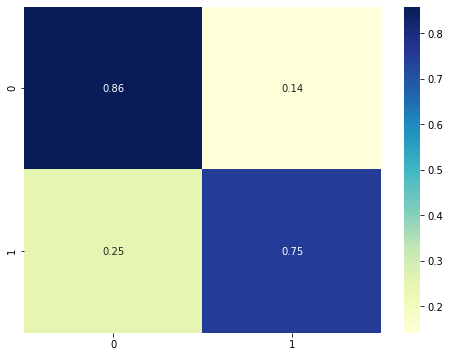

In [18]:
# Plotting Confusion Matrix
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred, normalize='true')
cr = classification_report(y_test, y_pred, labels=[0,1], output_dict=True)

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, cmap="YlGnBu", annot=True, fmt=".2f")

In [19]:
train.columns

Index(['class', 'sub_class', 'TLD', 'SSD_len', 'SUB_len', 'SLD_len', 'SSD_pct',
       'SUB_pct', 'SLD_pct', 'SSD_nan', 'SUB_nan', 'SLD_nan', 'SSD_etp',
       'SUB_etp', 'SLD_etp', 'SUB_num', 'SSD_val_1', 'SUB_val_1', 'SLD_val_1',
       'SSD_val_2', 'SUB_val_2', 'SLD_val_2', 'SSD_val_3', 'SUB_val_3',
       'SLD_val_3', 'SSD_dig_seq_l', 'SUB_dig_seq_l', 'SLD_dig_seq_l',
       'SSD_chr_seq_l', 'SUB_chr_seq_l', 'SLD_chr_seq_l', 'SSD_chr_seq_c',
       'SUB_chr_seq_c', 'SLD_chr_seq_c', 'SSD_bad_words', 'SUB_bad_words',
       'SLD_bad_words', 'SSD_target_words', 'SUB_target_words',
       'SLD_target_words', 'SSD_bad_words_rplc', 'SUB_bad_words_rplc',
       'SLD_bad_words_rplc', 'SSD_target_words_rplc', 'SUB_target_words_rplc',
       'SLD_target_words_rplc', 'connection', 'privacy', 'name', 'address',
       'state', 'country', 'email', 'servers', 'registrar', 'registrant',
       'org', 'age', 'SLDs in SUB', 'SLD Distance', 'TLD_TD_IDF'],
      dtype='object')

In [7]:
## Cross Validation
from sklearn.model_selection import cross_val_score

results = cross_val_score(clf, X_train, y_train, cv=None, scoring="accuracy")

# imprime vetor de acuracia por fold
print(results)
# imprime media dos resultados
print(np.mean(results))

[0.79816123 0.79271303 0.7965438  0.79084021 0.79414269]
0.794480193116317


     pred_neg  pred_pos
neg      5991      1381
pos      1570      5742
0.881414108220115


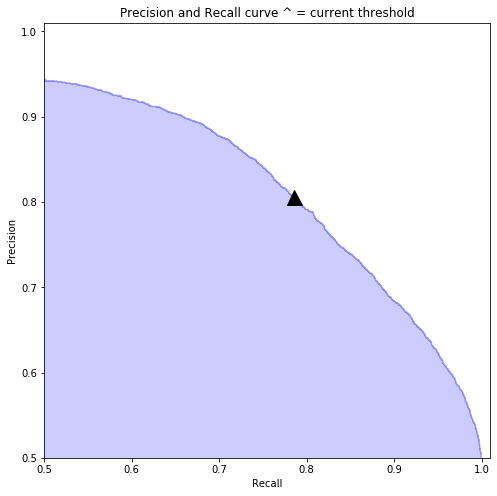

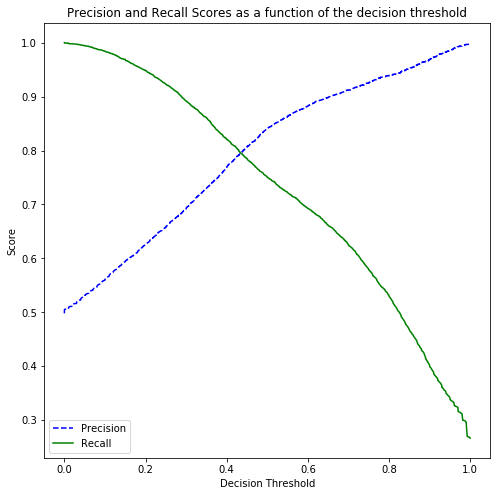

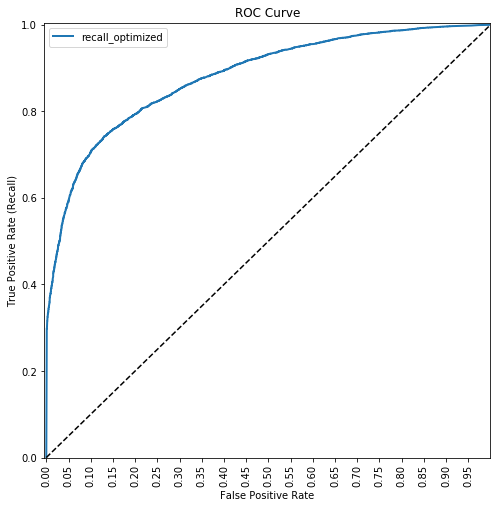

In [23]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    # plot the curve
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(r, p, color='b', alpha=0.2,
             where='post')
    plt.fill_between(r, p, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0.5, 1.01]);
    plt.xlim([0.5, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(r[close_default_clf], p[close_default_clf], '^', c='k',
            markersize=15)
    
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    
def plot_roc_curve(fpr, tpr, label=None):
    """
    The ROC curve, modified from 
    Hands-On Machine learning with Scikit-Learn and TensorFlow; p.91
    """
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')    

y_scores = clf.predict_proba(X_test)[:, 1]
p, r, thresholds = precision_recall_curve(y_test, y_scores)

# PR Cursve
precision_recall_threshold(p, r, thresholds, 0.45)

plot_precision_recall_vs_threshold(p, r, thresholds)


# Roc Curve
fpr, tpr, auc_thresholds = roc_curve(y_test, y_scores)
print(auc(fpr, tpr)) # AUC of ROC
plot_roc_curve(fpr, tpr, 'recall_optimized')    

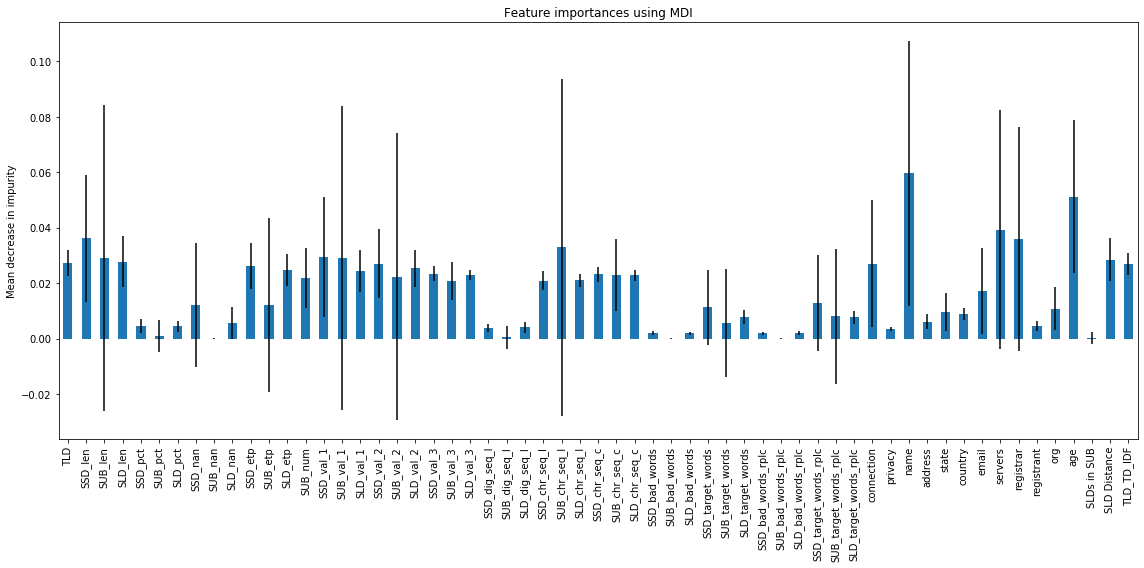

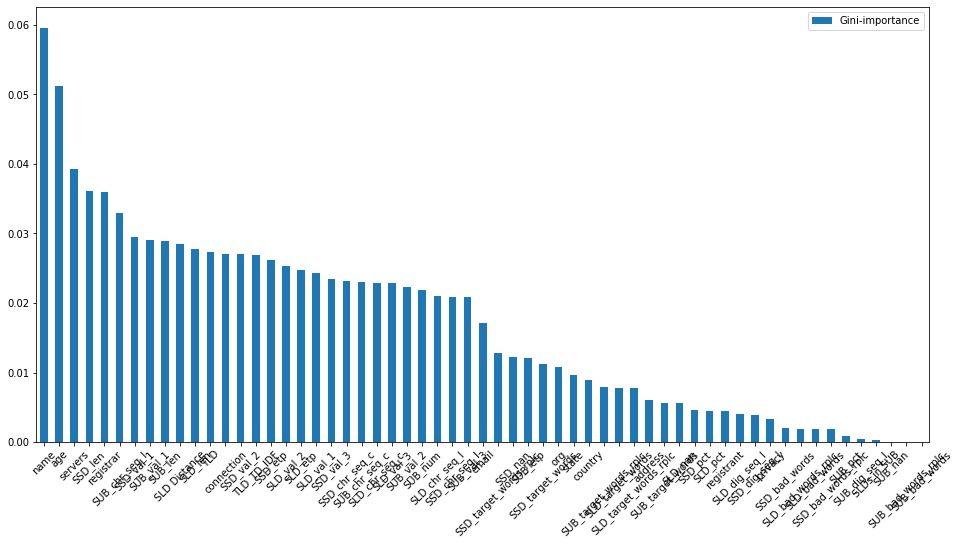

In [9]:
# Getting Features
importances = clf.feature_importances_
feature_cols = train.columns[2:]

# Importances With STD
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_cols)

fig, ax = plt.subplots(figsize=(16,8))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# Importances in Descending Order
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(feature_cols, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance', ascending=False).plot(kind='bar', rot=45, figsize=(16,8))

In [10]:
# indexes = []
# for i, pred in enumerate(y_pred):
#     if y_test[i] == 1 and y_pred[i]==0:
#         indexes.append(i)
        
# raw_test = pd.read_pickle('../Dataset/Test/raw_test.pickle')   
# raw_test.iloc[indexes][['domain']].to_csv('analyze.csv')

In [11]:
# Print Importances in Descending Order
importances.sort_values(by='Gini-importance', ascending=False)

,Gini-importance
name,0.059579
age,0.051229
servers,0.039342
SSD_len,0.036173
registrar,0.035984
SUB_chr_seq_l,0.032924
SSD_val_1,0.029446
SUB_val_1,0.029062
SUB_len,0.028966
SLD Distance,0.028526
